# Algoritmo da DFT pelo método matricial:

## Matriz de Vandermonde: 

<div style="font-size:25px;"> 
$$  
W = \frac{1}{\sqrt{N}} \begin{bmatrix}  
1 & 1 & 1 & \cdots & 1 \\
w^0 & w^1 & w^2 & \cdots & w^{N-1} \\
w^0 & w^2 & w^4 & \cdots & w^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
w^0 & w^3 & w^6 & \cdots & w^{3(N-1)}  
\end{bmatrix}  
$$  
</div>

### onde: 
<div style="font-size:30px;">  
$$  
w = e^{-\frac{j 2 \pi}{N}}  
$$  
</div>

## para simplificar o cálculo de grandes potências, utilizando a propriedade do circuito trigono métrico, podemos fazer:

<div style="font-size:30px;">  
$$  
    W^{(N + n)} = W^n
$$  
</div>

## Para N= 8, teriamos: 


<div style="font-size:25px;">  
\[  
W = \begin{bmatrix}  
W^0 & W^1 & W^2 & W^3 & W^4 & W^5 & W^6 & W^7 \\
W^8 & W^9 & W^{10} & W^{11} & W^{12} & W^{13} & W^{14} & W^{15} \\
W^{16} & W^{17} & W^{18} & W^{19} & W^{20} & W^{21} & W^{22} & W^{23} \\
W^{24} & W^{25} & W^{26} & W^{27} & W^{28} & W^{29} & W^{30} & W^{31} \\
W^{32} & W^{33} & W^{34} & W^{35} & W^{36} & W^{37} & W^{38} & W^{39} \\
W^{40} & W^{41} & W^{42} & W^{43} & W^{44} & W^{45} & W^{46} & W^{47} \\
W^{48} & W^{49} & W^{50} & W^{51} & W^{52} & W^{53} & W^{54} & W^{55} \\
W^{56} & W^{57} & W^{58} & W^{59} & W^{60} & W^{61} & W^{62} & W^{63} \\
\end{bmatrix}  
\]
</div>

# Mas utilizando a propriedade vista acima, temos:


<div style="font-size:14px;">  
\[  
W = \frac{1}{\sqrt{8}} \begin{bmatrix}  
w^0 & w^0 & w^0 & w^0 & w^0 & w^0 & w^0 & w^0 \\
w^0 & w^1 & w^2 & w^3 & w^4 & w^5 & w^6 & w^7 \\
w^0 & w^2 & w^4 & w^6 & w^0 & w^2 & w^4 & w^6 \\
w^0 & w^3 & w^6 & w^1 & w^4 & w^7 & w^2 & w^5 \\
w^0 & w^4 & w^0 & w^4 & w^0 & w^4 & w^0 & w^4 \\
w^0 & w^5 & w^2 & w^7 & w^4 & w^1 & w^6 & w^3 \\
w^0 & w^6 & w^4 & w^2 & w^0 & w^6 & w^4 & w^2 \\
w^0 & w^7 & w^6 & w^5 & w^4 & w^3 & w^2 & w^1 \\
\end{bmatrix}   
= \frac{1}{\sqrt{8}} \begin{bmatrix}  
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
1 & w & -j & -jw & -1 & -w & j & jw \\
1 & -j & -1 & j & 1 & -j & -1  & j \\
1 & -jw & j & w & -1 & jw & -j & -w \\
1 & -1 & 1 & -1 & 1 & -1 & 1 & -1\\
1 & -w & -j & jw & -1 & w & j & -jw\\
1 & j & -1 & -j & 1 & j & -1 & -j \\
1 & jw & j & -w & -1 & -jw & -j & w   
\end{bmatrix}  
\]
</div>




In [161]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-poster')
%matplotlib inline

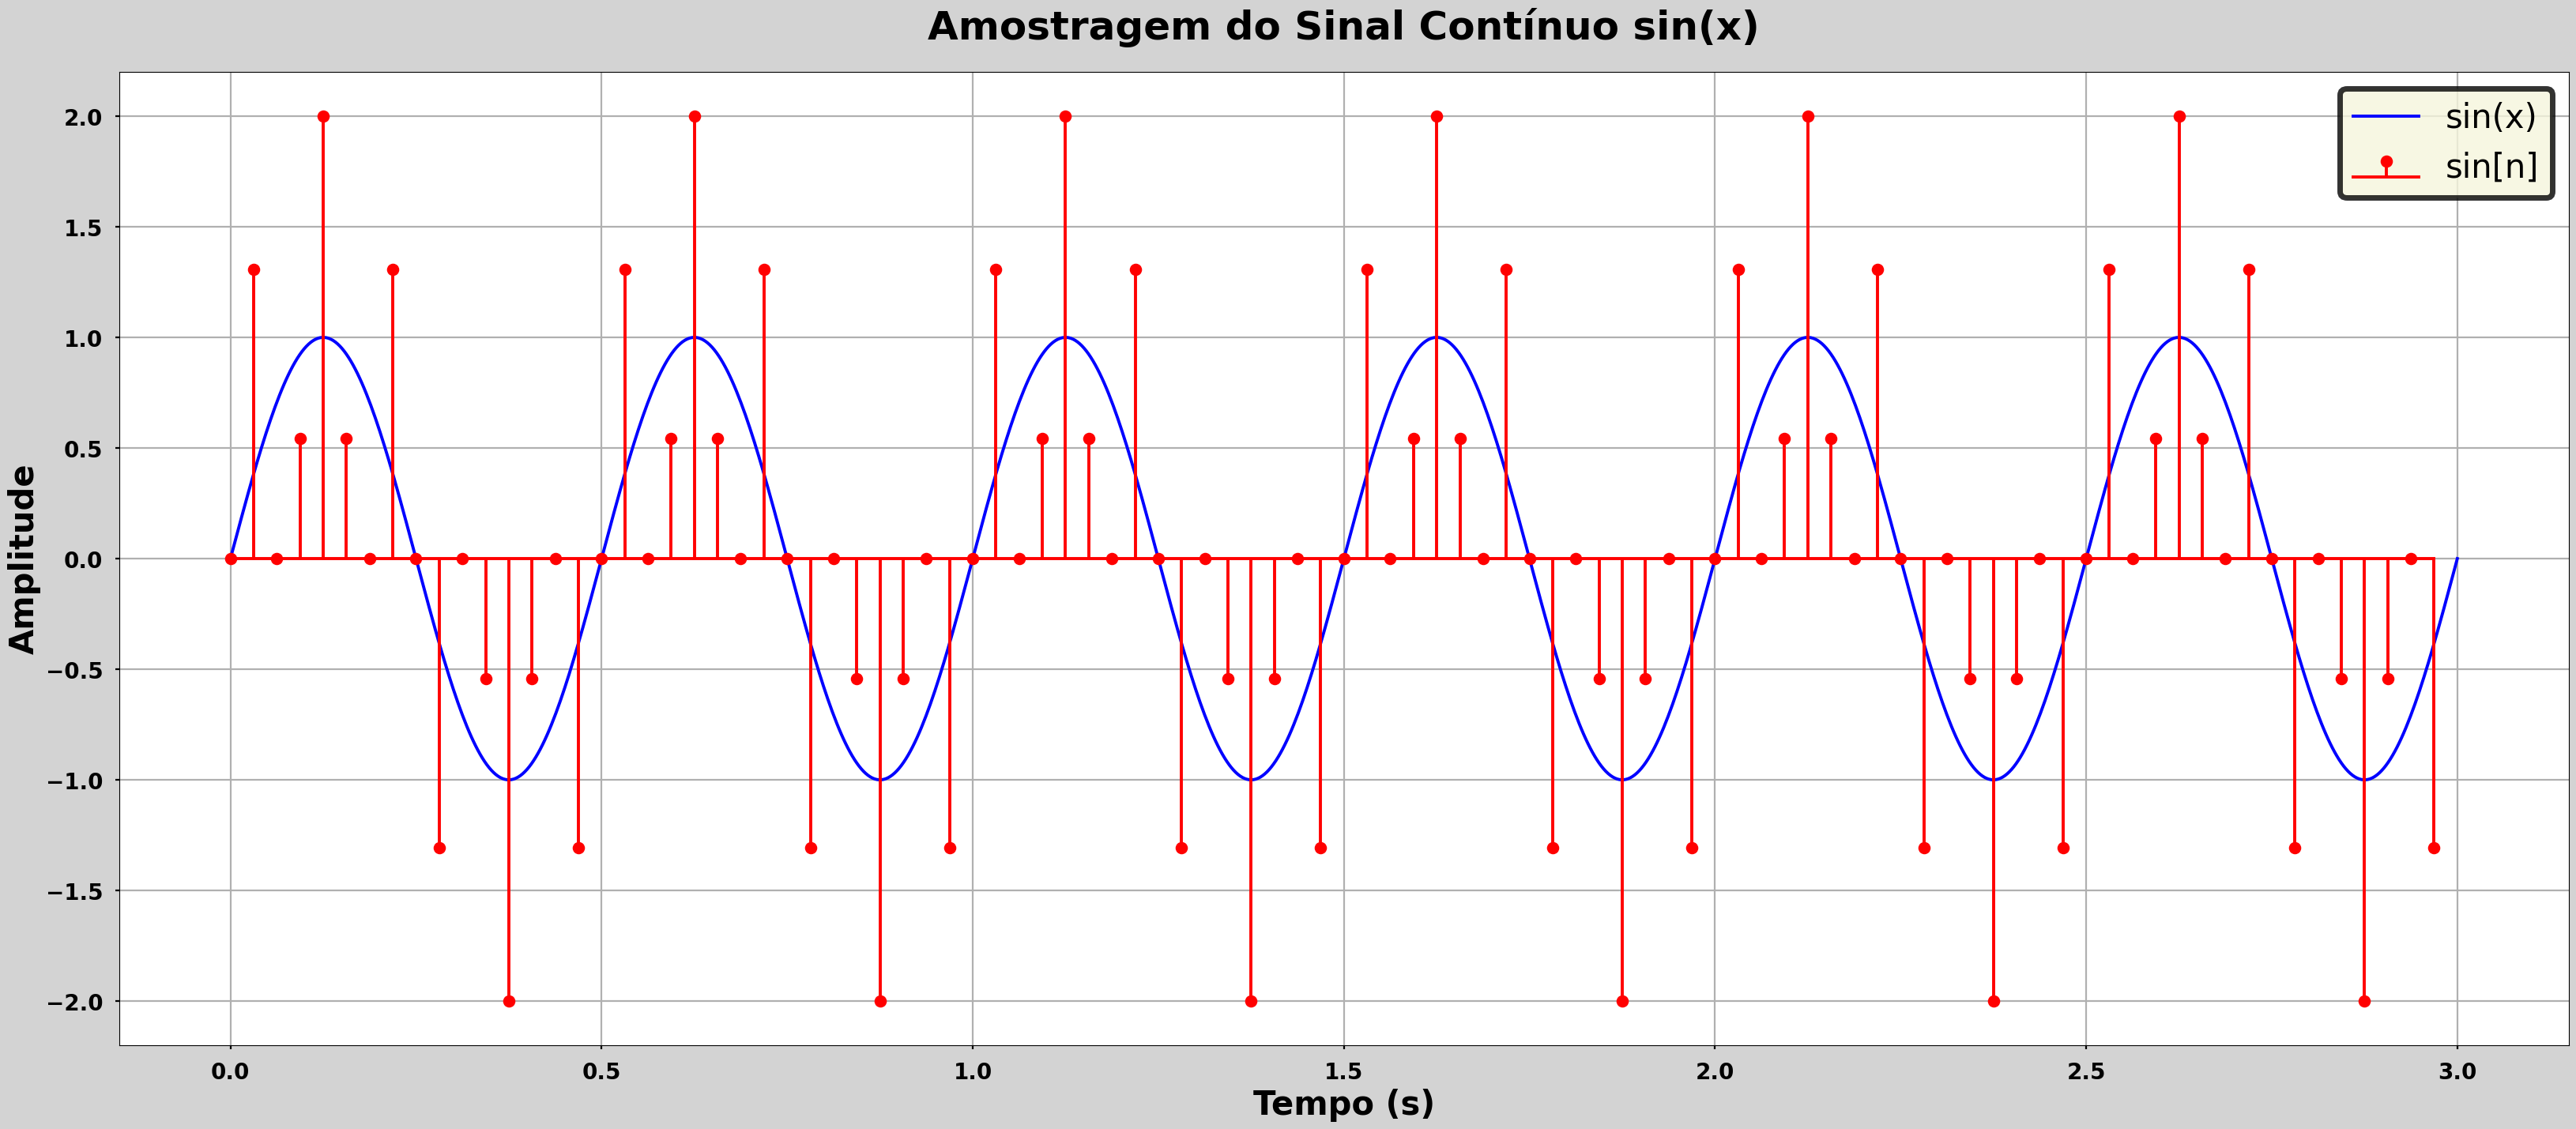

In [173]:
# Amostra o sinal

freq = 2
t = 3
n_samples = 32

t_axis = np.linspace(0, t, 1000)
t_sampled = np.arange(0, t, 1/n_samples)

continuous_signal = np.sin(2 * np.pi * freq * t_axis)
sampled_signal = np.sin(2 * np.pi * freq * t_sampled) + np.sin(10 * np.pi * freq * t_sampled)
 
ax = plt.figure(figsize=(40, 16))  
ax.set_facecolor('lightgrey')
plt.plot(t_axis, continuous_signal, label='sin(x)', color='b')
plt.stem(t_sampled, sampled_signal, linefmt='r-', markerfmt='ro', basefmt='r-', label='sin[n]')
plt.title('Amostragem do Sinal Contínuo sin(x)', fontsize=36, fontweight='bold', pad=30)  
plt.xlabel('Tempo (s)', fontsize=30, fontweight='bold')  
plt.ylabel('Amplitude', fontsize=30, fontweight='bold') 
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
legend = plt.legend(fontsize=30, edgecolor='black', facecolor='beige', frameon=True)
legend.get_frame().set_linewidth(5)
plt.grid()  
plt.show()

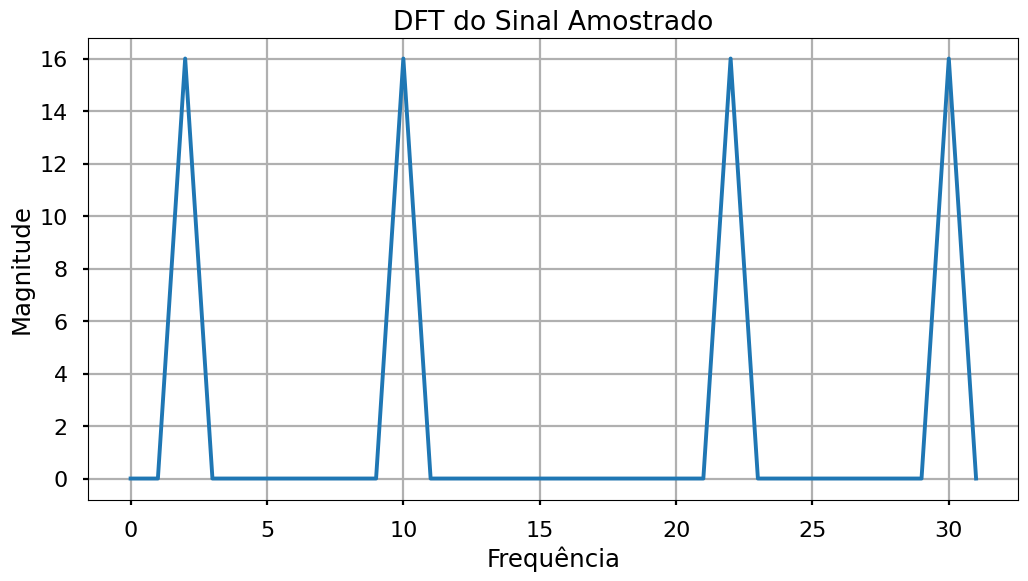

In [171]:
# Calcula a DFT do sinal amostrado  
dft_signal = np.zeros(n_samples, dtype=complex)  
for k in range(n_samples):  
    for n in range(n_samples):  
        dft_signal[k] += sampled_signal[n] * np.exp(-1j * 2 * np.pi * k * n / n_samples)   

freq_axis = np.arange(n_samples)  
plt.figure(figsize=(12, 6))  
plt.plot(freq_axis, np.abs(dft_signal))  
plt.title('DFT do Sinal Amostrado')  
plt.xlabel('Frequência')  
plt.ylabel('Magnitude')  
plt.grid()  
plt.show()